# Pandas and Matplotlib Homework

In [1]:
#load the libraries using the normal convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##prevent plotting errors
%matplotlib inline

In [2]:
#Load our excel files of interest into pandas
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


#Appendix:
 1. DF = Pandas DataFrame
 2. NHL_Goalies DF = NHL_Goalies 
 3. GAA_ DF = GAA_

### Q1A) Create a new DF (*called NHL_Ones*) by:
#### Filtering the correct DF for Goalies that played 1 game <font color='red'> (GP = Games played)</font>

Notes: How would you find the 'GP' column in these files?

In [3]:
#Answer 1A:
#NHL_Goalies_GP = NHL_Goalies[["GP"]]
#print(NHL_Goalies_GP)

NHL_Ones = NHL_Goalies.loc[NHL_Goalies['GP'] == 1]

#print(NHL_Ones)
#print(NHL_Ones['GP'])


 ## Q1B) 
 #### A. Find the value of the minimum Salary for the entire dataset 
 #### B. Replace the missing values from the NHL_Ones DF with this
 #### C. Create a new DF after replacement by **adding** a column called  "Adjusted_Salary"
 #### D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

#### Notes:
1. Note where the minimum Salary value is coming & where you are going to assign it to
2. Read up on **replacement** of missing values
3. Look up Numpy definition for null
4. Look up Pandas **Series** Naming 
5. Review concat function in Pandas
6. Review how to slice columns

In [4]:
#Answer 1Ba:
#finding the minimum salary for the entire dataset
min_salary = NHL_Goalies['Salary'].min()
print(min_salary)

#Answer 1Bb&c:

#Create a new column to modify for the goalies who played only one game
NHL_Ones['Adjusted_Salary'] = NHL_Ones['Salary']
#print(NHL_Ones['Salary'])
#print(NHL_Ones['Adjusted_Salary'])

#fill that column in with the minimum salary for the dataset
NHL_Ones['Adjusted_Salary'].fillna(min_salary, inplace=True)

#Answer 1Bd
print(NHL_Ones['Salary'])
print(NHL_Ones['Adjusted_Salary'])


575000.0
1          NaN
13         NaN
14    575000.0
16    708750.0
22    780000.0
27    650000.0
29    925000.0
32         NaN
42    575000.0
50    673334.0
67         NaN
80         NaN
87    832500.0
89         NaN
90    892500.0
Name: Salary, dtype: float64
1     575000.0
13    575000.0
14    575000.0
16    708750.0
22    780000.0
27    650000.0
29    925000.0
32    575000.0
42    575000.0
50    673334.0
67    575000.0
80    575000.0
87    832500.0
89    575000.0
90    892500.0
Name: Adjusted_Salary, dtype: float64


/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Q2) A. Subset the NHL goalies data to include Goalies that played in more than 25 games AND have a GAA lower than 3.00 and store the New DF as 'workhorse'


Notes: 
1. Review notes creating "boolean" masks
2. Internet search for Multiple Boolean indexing on multiple columns in a Pandas DataFrame

In [5]:
#Answer 2:
workhorse = NHL_Goalies[(NHL_Goalies['GP']>25) & (NHL_Goalies['GAA']<3)]

### Q3. Create 2 python functions that: 
<br> </br>
#### A. Creates/*Returns* a new DataFrame that displays the number of missing values in every column. 
#### This new DataFrame has one new column named "Missing" with the sum of the missing values from the columns

### Notes 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
** One Proposed method:**
1. Create a pandas series object from the sum of the nulls in every column
2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.

### Expected Output:
<img src='Missing_cols_expectedoutput.png'>

In [6]:
# Answer 3A: CODE HERE; Please comment each part

#create an object that sums the number of nulls in each column
na_count = NHL_Ones.isna().sum()

#It's not a datafram, it's just a pandas object still
print(type(na_count))
#print(na_count)

NHL_Ones_long = NHL_Ones.append(na_count, ignore_index=True)
print(NHL_Ones_long)

print('Row 15 represents the number of missing values in every COLUMN')


<class 'pandas.core.series.Series'>
      Last Name First Name Team         DOB        Birth City  S/P Cntry  Nat  \
0         Alves      Jorge  CAR  1979-01-30            Boston   MA   USA  USA   
1      Campbell       Jack  LAK  1992-01-09        Port Huron   MI   USA  USA   
2        Comrie       Eric  WPG  1995-07-06          Edmonton   AB   CAN  CAN   
3        Copley    Pheonix  STL  1992-01-18        North Pole   AK   USA  USA   
4      Driedger      Chris  OTT  1994-05-18          Winnipeg   MB   CAN  CAN   
5      Forsberg      Anton  CBJ  1992-11-27         Härnösand  NaN   SWE  SWE   
6       Gillies        Jon  CGY  1994-01-22           Concord   NH   USA  USA   
7    Gudlevskis   Kristers  TBL  1992-07-31        Aizkraukle  NaN   LVA  LVA   
8         Jarry    Tristan  PIT  1995-04-29            Surrey   BC   CAN  CAN   
9     Langhamer      Marek  ARI  1994-07-22  Moravska Trebova  NaN   CZE  CZE   
10  Nedeljkovic       Alex  CAR  1996-01-07             Parma   OH   USA 

#### B. Creates a new *column* called 'missing_values' in the input DF that sums the missing values in each row.

### Notes: 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
Check out how to use axis argument and how to create new columns in an existing dataframe

### Expected Output:
<img src= 'missingrows_expectedoutput.png'>

In [7]:
#Answer 3B here; Please comment each part

#counts number of missing pieces of data in each ROW
na_row_count = NHL_Ones.shape[1] - NHL_Ones.count(axis=1)

#Give it a name
NHL_Ones["Nas"]=na_row_count

#Just checking it works
print(NHL_Ones[['Last Name','Nas']])

      Last Name  Nas
1         Alves   18
13     Campbell   11
14       Comrie    7
16       Copley   10
22     Driedger    8
27     Forsberg    8
29      Gillies    3
32   Gudlevskis   12
42        Jarry    7
50    Langhamer    9
67  Nedeljkovic   11
80      Rittich   15
87       Subban    7
89     Tokarski   11
90      Ullmark    8


/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Q4) Matplotlib Question Plot in one figure and 2 side by side plots:
<br> </br>
#### A. Plot the histogram of the all the GAA of the NHL_Goalies DF  AND the goalies that played in more than 25 games with a GAA < 3.00, 
#### B. Label the Titles of the plots differently (*ie EntireSet + Subset*)
#### C. Change the color of one of the plots from the default

Text(0.5,1,'Subset')

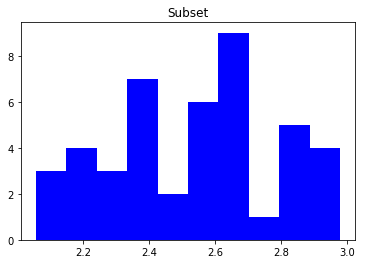

In [8]:
plt.hist(workhorse['GAA'],color='Blue')
plt.title('Subset')

Text(0.5,1,'EntireSet')

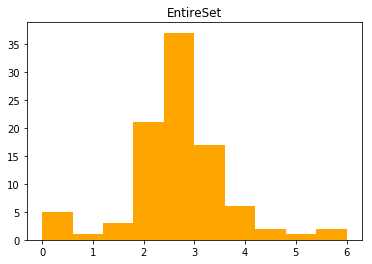

In [9]:
plt.hist(NHL_Goalies['GAA'],color='Orange')
plt.title('EntireSet')

# Notes

1. convert your column of interest into a NumPY array (look up online for usage)
2. Review: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

In [10]:
#Answer 4 here: please comment

#make a new object that's just GAA, and make it into a NumPY array
b=NHL_Goalies.iloc[:,25].values

#check it's really GAA values, and really a NumPY array
print(b)
print(type(b))

[2.42224487 0.         2.66888928 2.27982984 2.64242561 2.49851577
 3.44919359 3.41674839 1.98922503 2.53754958 2.05553358 1.98526094
 2.17636627 0.         4.04721754 2.47804109 5.09049774 3.45667447
 2.55015091 2.38069388 1.9990095  3.07753255 6.         2.25119745
 2.55236868 3.935382   3.02082108 4.09672831 2.21668616 1.
 2.68725155 2.04022458 0.         3.1006181  2.80289425 4.08460977
 1.52833793 2.88773755 2.0705584  2.10493658 2.9165659  2.3851136
 3.06382979 2.59288695 2.39977897 2.64471528 2.64212725 2.88418966
 3.13380393 2.64256549 3.86680988 2.67804706 2.85161229 3.42395181
 1.47904684 2.74037423 2.6820637  2.6253264  4.34701839 2.66078138
 4.73017363 2.69686688 3.96853234 2.80212339 2.66694324 3.04460166
 2.40798322 0.         2.81600626 3.29765693 2.66801415 3.54948805
 3.15987461 2.97844175 2.23292942 2.25576024 2.26298434 2.23399918
 2.52948557 2.42167172 3.         2.35016321 2.81614436 3.53775758
 2.9230513  1.51366503 2.07400842 5.88235294 2.38938053 0.
 3.06469921 

### Q5) GroupBy Question
##### 1. Subset the NHL_Goalies DataFrame where Injuries is not known <font color='red'>(Injuries=NaN)</font>; 
##### 2. Use a Merge with the GAA_  DF to produce a NEW DF (*called mergedDF*) 
###### *** USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS***
###### *** USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS***
##### 3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
##### 4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
#### 5. Create a dataframe of the <font color='red'>TOI </font>groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

## Notes:

1. Review or read up pandas documentation on:
    - how to create selection criteria
    - how aggs/joins work: https://pandas.pydata.org/pandas-docs/stable/merging.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
3. https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.get.html

In [48]:
#Answer 5 here: please comments
#1 Subset the NHL_Goalies DataFrame where Injuries is not known (Injuries=NaN);
NHL_Goalies_unknownInjuries = NHL_Goalies[NHL_Goalies['Injuries'].isna()]
#print(NHL_Goalies_unknownInjuries)


#2. Use a Merge with the GAA_ DF to produce a NEW DF (called mergedDF)
#* USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS*
#* USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS*

#Made a unique ID in both datasets
NHL_Goalies_unknownInjuries['FullName'] = NHL_Goalies_unknownInjuries['Last Name'] + NHL_Goalies_unknownInjuries['First Name']
workhorse['FullName'] = workhorse['Last Name'] + workhorse['First Name']

#This didn't work. I thought an outer join was what the question wanted, but it's a mess, so I've gone with the default (inner)
#mergedDF = pd.merge(NHL_Goalies_unknownInjuries,workhorse,how='outer',on='FullName')
mergedDF = pd.merge(NHL_Goalies_unknownInjuries,workhorse[['FullName']],on='FullName')
#print(mergedDF)
#print(workhorse)
#this duplicates all the columns, which is obviously wrong, unless I put workhorse[['FullName']]

#3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
mergedDF_partial = mergedDF[['First Name','Last Name','Team','Cntry','SV%','GA','GAA']]
#print(mergedDF_partial)

#4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
mergedDF_byCountry_means = mergedDF.groupby('Cntry').mean()
mergedDF_byCountry_mins = mergedDF.groupby('Cntry').min()
mergedDF_byCountry_maxs = mergedDF.groupby('Cntry').max()
#print(mergedDF_byCountry)

#5. Create a dataframe of the TOI groupby object and write it to a comma seperated value file called ('TOI_2017.csv')
#I don't know what TOI is, so I'm just going to write mergedDF_byCountry_means as a csv
np.savetxt('mergedDF_byCountry_means.csv', mergedDF_byCountry_means, delimiter=',')

/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# Q6) Write a function(s)  
## that subsets a dataframe by removing rows that are WITHIN the InterQuartile Region of a specified column
<br> </br>
### The function takes as input 
##### A: Pandas_Dataframe (For example use NHL_GoaliesDF)
##### B. Column name
### Add a condition that returns an error if the Column Name chosen is not:
##### A. Numeric Dtype
##### B. Does not exist in the Numeric Columns
### The output is a DataFrame that removes rows outside of the specified columns IQR
<br> </br>
<font color='red'>**You can use smaller helper functions **<font>
<br> </br>
See --> <href>=https://en.wikipedia.org/wiki/Interquartile_range</href>
#hint: There are several pandas subfunctions that can be useful

In [58]:
#I have not done this question.

#First, I'll just do this directly on the dataset:
#Q3=np.percentile(NHL_Goalies[['GAA']],75)
#Q1=np.percentile(NHL_Goalies[['GAA']],25)
#not_in_IQR = NHL_Goalies[(NHL_Goalies['GAA']<Q1) | (NHL_Goalies['GAA']>Q3)]


#THIS DOES NOT WORK AS A FUNCTION
def df_none_in_IQR(df,ColumnName):
    Q3=np.percentile(df[['ColumnName']],75)
    Q1=np.percentile(df[['ColumnName']],25)
    not_in_IQR = df[(df['ColumnName']<Q1) | (df['ColumnName']>Q3)]
    
    return not_in_IQR

print df_none_in_IQR(NHL_Goalies,'GAA')

SyntaxError: invalid syntax (<ipython-input-58-eb3230655dcb>, line 15)